# Data Analyst Project: Business Decision Research
#### churn analysis terhadap produk. Harapannya adalah bisa memberikan rekomendasi dan strategi untuk menurunkan churn dari pelanggan.

### Importing Data dan Inspection

In [1]:
import pandas as pd

df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv", sep=";")

In [2]:
print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

### Data Cleansing

Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka ubahlah kedua kolom tersebut ke tipe data datetime. Kemudian cetaklah kembali 5 data teratas dari dataframe df dan juga tipe data masing-masing kolomnya.

In [8]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

### Churn Customers
customer termasuk sudah bukan disebut pelanggan lagi (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia

In [9]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction']<='2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction']>'2018-08-01', 'is_churn'] = False 

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

In [10]:
df['is_churn'].value_counts()

True     66569
False    33431
Name: is_churn, dtype: int64

### Menghapus kolom yang tidak diperlukan

In [11]:
df.drop('no', axis=1, inplace=True)
df.drop('Row_Num', axis=1, inplace=True)
#caralain
# del df['no']
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


### Customer acquisition by year

In [12]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()

In [16]:
df_year.sum()

100000

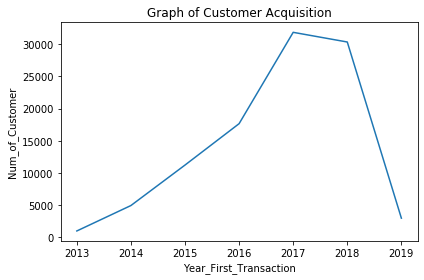

In [17]:
import matplotlib.pyplot as plt
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='line', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

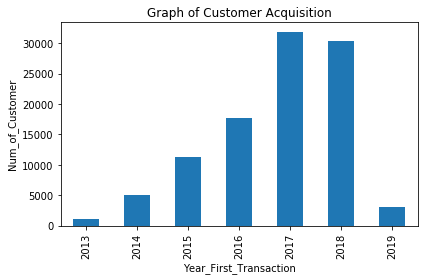

In [18]:
import matplotlib.pyplot as plt
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Jumlah customer mengalami peningkatan dari tahun 2013-2017, mulai sedikit menurun pada tahun 2018 lalu menurun tajam di tahun 2019.

### Transaction By Year

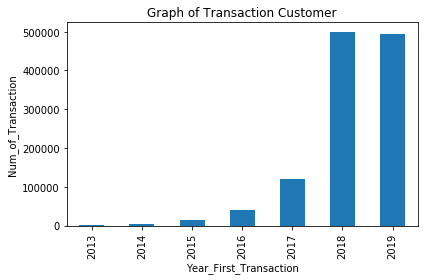

In [19]:
plt.clf()
df_year = df.groupby(['Year_Last_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

### Average transaction amount by year

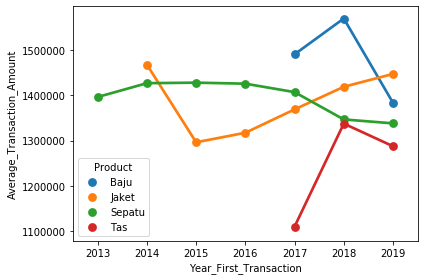

In [20]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

### Proporsi churned customer untuk setiap produk

In [21]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
df_piv


Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


<Figure size 432x288 with 0 Axes>

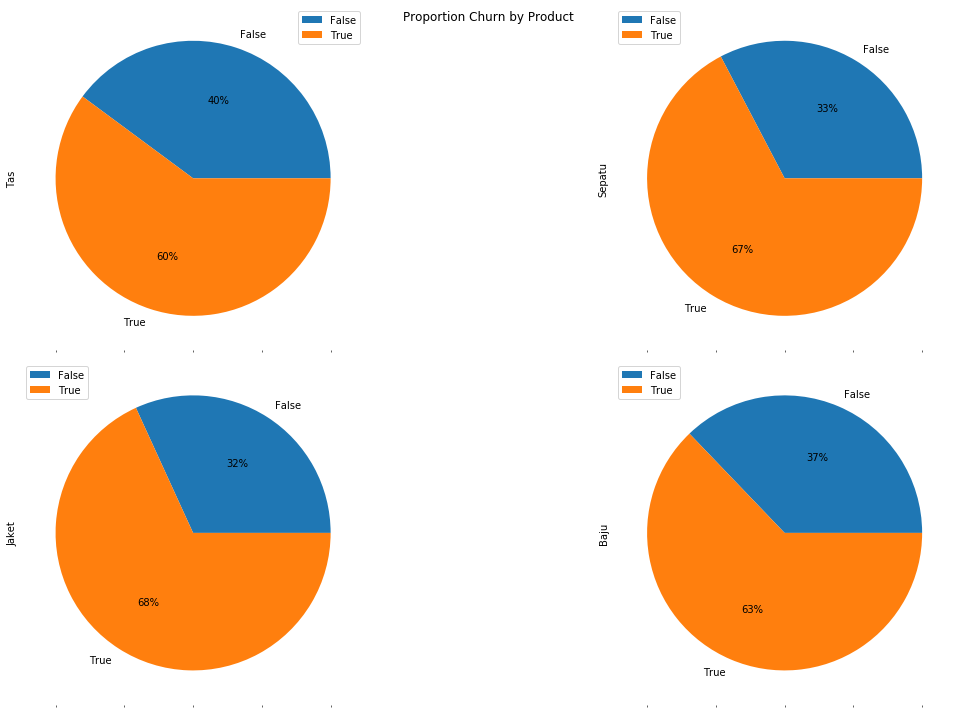

In [22]:
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(20, 10),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

### Distribusi kategorisasi count transaction
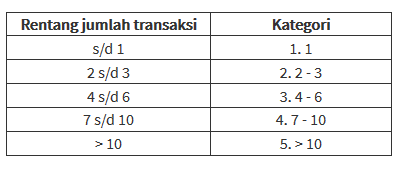

In [23]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction']> 3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction']> 6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val

<Figure size 432x288 with 0 Axes>

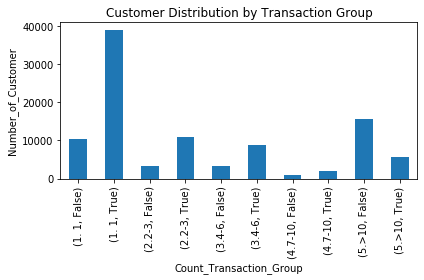

In [24]:
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(lambda row: func(row), axis=1)

df_year = df.groupby(['Count_Transaction_Group','is_churn'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Number_of_Customer')
plt.tight_layout()
plt.show()

### Distribusi kategorisasi average transaction amount
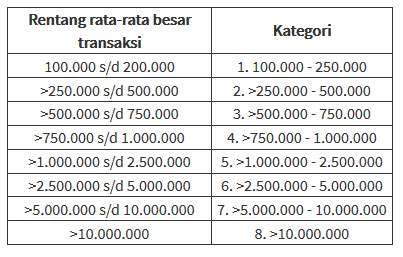

In [25]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <=500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <=750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <=1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <=2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <=5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <=10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

<Figure size 432x288 with 0 Axes>

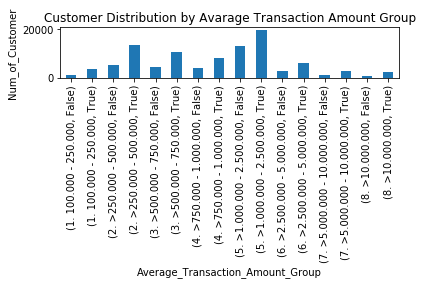

In [26]:
df_year = df.groupby(['Average_Transaction_Amount_Group','is_churn'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Avarage Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## Modeling
### Feature Columns dan Target

In [27]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

### Split X dan y ke dalam bagian training dan testing

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
y_train.value_counts()

True     49900
False    25100
Name: is_churn, dtype: int64

### Train, predict dan evaluate

In [32]:
# Linear Regression
# Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

In [33]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')
# fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Predict model
y_pred_tes = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_tes)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


In [36]:
from sklearn.metrics import roc_auc_score

# assigning the scorign of the model to a variable 
train_score = roc_auc_score(y_train, y_pred_train)
test_score = roc_auc_score(y_test, y_pred_tes)

In [37]:
train_score

0.4999893811527437

In [38]:
test_score

0.49997002940294155

<Figure size 432x288 with 0 Axes>

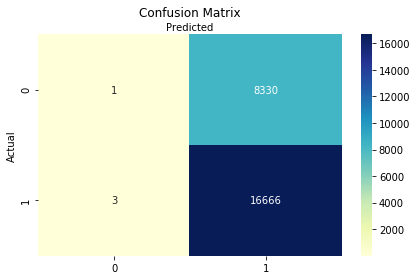

In [28]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### Accuracy, Precision, dan Recall

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668


### Modeling using RandomForest

In [39]:
# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 
# creating a RF classifier 
clf = RandomForestClassifier()   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
# performing predictions on the test dataset 
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

In [42]:
# assigning the scorign of the model to a variable 
print('roc train: ',roc_auc_score(y_train, train_pred))
print('roc test: ',roc_auc_score(y_test, test_pred))

roc train:  0.9954156919416521
roc test:  0.6195187085043239


In [44]:
grid_param = {'n_estimators': [50,100], 
              'class_weight': ['balanced'], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6] 
              } 

In [46]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, grid_param, cv=3, scoring= 'roc_auc')
grid_search.fit(X_train, y_train)

# fitting the grid search on to the train data

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [47]:
grid_search.best_params_
# checking to see what parameters were selected as the best

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'n_estimators': 50}

In [48]:
best_grid_param = {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'n_estimators': 50}

In [56]:
# setting grid search best estimator to a variable 
# fitting that varible on to the train data 
rcf_grid = grid_search.best_estimator_
rcf_grid.fit(X_train, y_train)


# predicting on the test and train data 
test_pred2 = rcf_grid.predict(X_test)
train_pred2 = rcf_grid.predict(X_train)
# assigning the scorign of the model to a variable 
print('roc train: ',roc_auc_score(y_train, train_pred2))
print('roc test: ',roc_auc_score(y_test, test_pred2))

roc train:  0.6923928334757163
roc test:  0.6949305959247087


In [59]:
# Evaluasi model menggunakan confusion matrix
cnf_matrix_rf = confusion_matrix(y_test, test_pred2)
print('Confusion Matrix:\n', cnf_matrix_rf)

Confusion Matrix:
 [[ 4280  4051]
 [ 2065 14604]]


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, test_pred2))
print('Precision:', precision_score(y_test, test_pred2, average='micro'))
print('Recall   :', recall_score(y_test, test_pred2, average='micro'))

Accuracy : 0.75536
Precision: 0.75536
Recall   : 0.75536
